In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [75]:
data = pd.read_csv('loan_approval_dataset.csv')
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [77]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [78]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [79]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [80]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [81]:
data.drop(['loan_id'],axis=1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [82]:
data.select_dtypes(include='object').nunique()

 education        2
 self_employed    2
 loan_status      2
dtype: int64

In [83]:
label_encoder = LabelEncoder()

data[' education'] = label_encoder.fit_transform(data[' education'])
data[' self_employed'] = label_encoder.fit_transform(data[' self_employed'])
data[' loan_status'] = label_encoder.fit_transform(data[' loan_status'])

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


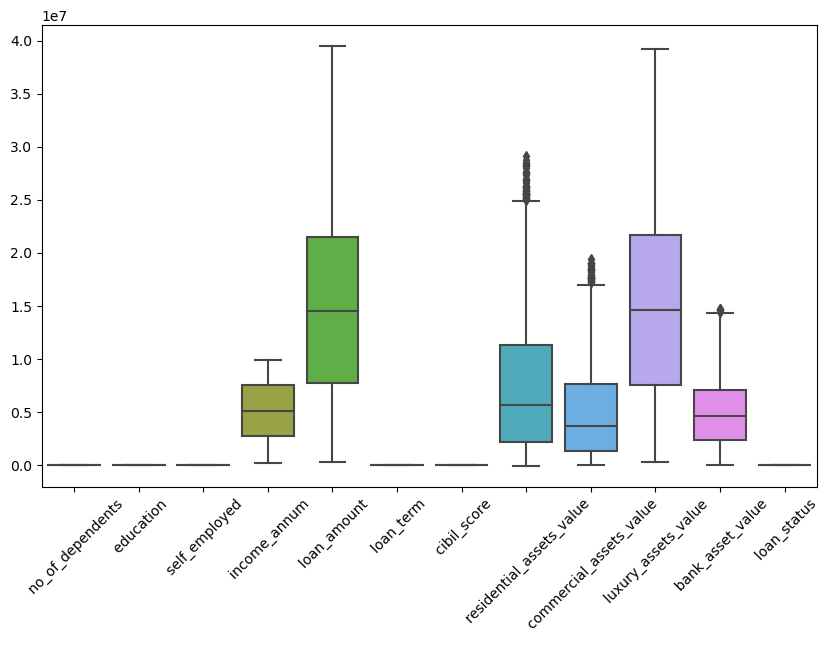

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['loan_id'])) 
plt.xticks(rotation=45)
plt.show()

In [85]:
data_no_outliers = data.drop(columns=['loan_id']).apply(lambda x: x[(x - x.mean()).abs() < 3 * x.std()])

print("initial dataset:", data.shape)
print("dataset after removing outliers:", data_no_outliers.shape)

initial dataset: (4269, 13)
dataset after removing outliers: (4269, 12)


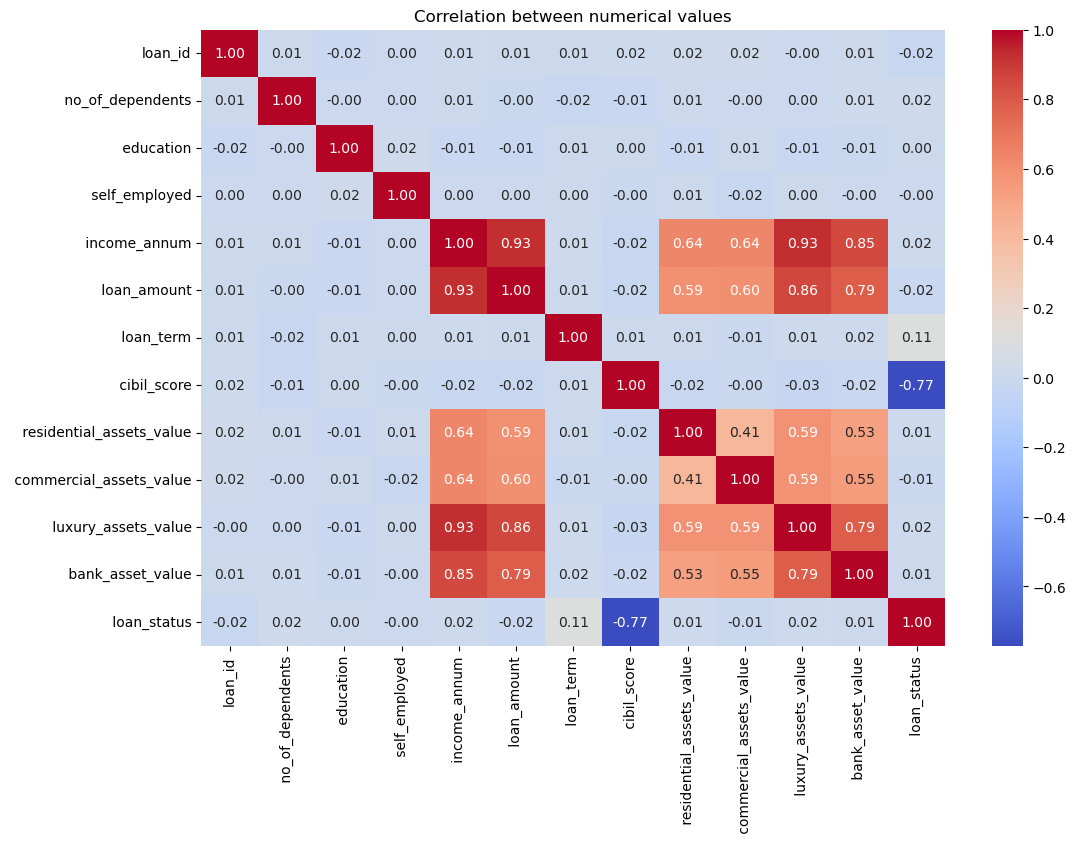

In [86]:
correlation_matrix = data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between numerical values')
plt.show()

In [87]:
correlation_matrix

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


Linear regression:

In [88]:
X = data[[' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']]
y = data[' income_annum']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('Mean Squared Error:', mean_squared_error(y_test, y_pred).round(4))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred).round(4))

print('R-squared:', r2_score(y_test, y_pred).round(4))

Mean Squared Error: 482371612602.8202
Mean Absolute Error: 504348.099
R-squared: 0.9379


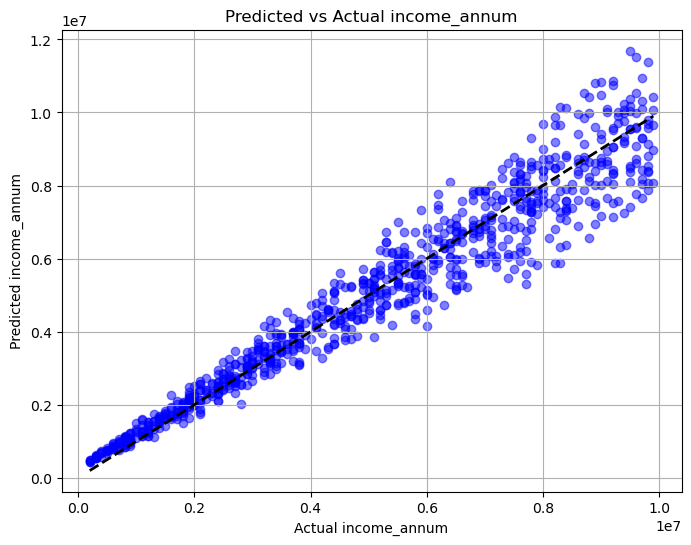

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('Actual income_annum')  
plt.ylabel('Predicted income_annum')  
plt.title('Predicted vs Actual income_annum')  
plt.grid(True) 
plt.show()


Log regression w confusion matrix

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data[[' education', ' self_employed', ' cibil_score']]
y = data[' loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9309133489461359
Confusion Matrix:
[[502  34]
 [ 25 293]]
Precision: 0.8960244648318043
Recall: 0.9213836477987422
F1 Score: 0.9085271317829456
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       536
           1       0.90      0.92      0.91       318

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



ROC curve for logistic regression:

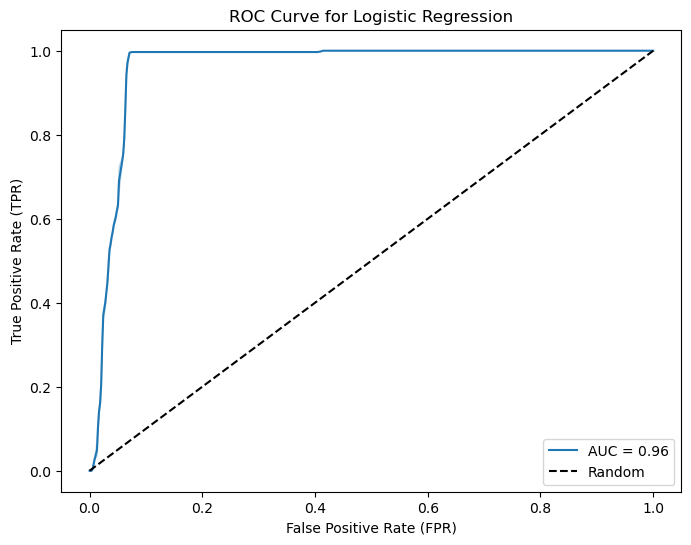

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

y_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


# Assignment 3

## learning curve

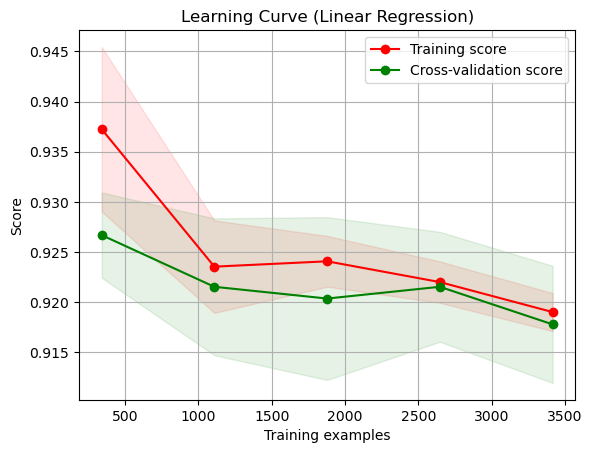

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (Linear Regression)"
cv = 5 # Number of cross-validation folds
plot_learning_curve(model, title, X, y, cv=cv, n_jobs=-1)

plt.show()


In [93]:
# Performance Evaluation before Optimization
print("Before Optimization:")
print('Training Set - Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_train, model.predict(X_train)).round(4))
print('Mean Absolute Error:', mean_absolute_error(y_train, model.predict(X_train)).round(4))
print('R-squared:', model.score(X_train, y_train).round(4))

print('\nTesting Set - Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred).round(4))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred).round(4))
print('R-squared:', r2_score(y_test, y_pred).round(4))

Before Optimization:
Training Set - Linear Regression:
Mean Squared Error: 0.0814
Mean Absolute Error: 0.0814
R-squared: 0.9186

Testing Set - Linear Regression:
Mean Squared Error: 0.0691
Mean Absolute Error: 0.0691
R-squared: 0.7044


## Ridge regularization

In [43]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge regression model
ridge_model = Ridge(alpha=1.0)  

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print('Ridge Regression - Training Set:')
print('Mean Squared Error:', mse_train_ridge.round(4))
print('Mean Absolute Error:', mae_train_ridge.round(4))
print('R-squared:', r2_train_ridge.round(4))

print('\nRidge Regression - Testing Set:')
print('Mean Squared Error:', mse_test_ridge.round(4))
print('Mean Absolute Error:', mae_test_ridge.round(4))
print('R-squared:', r2_test_ridge.round(4))


Ridge Regression - Training Set:
Mean Squared Error: 0.0953
Mean Absolute Error: 0.2463
R-squared: 0.5952

Ridge Regression - Testing Set:
Mean Squared Error: 0.0964
Mean Absolute Error: 0.2467
R-squared: 0.5874


## Elastic net

In [44]:
from sklearn.linear_model import ElasticNet

# Create Elastic Net regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters

# Train the model
elastic_net_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_elastic_net = elastic_net_model.predict(X_train_scaled)
y_pred_test_elastic_net = elastic_net_model.predict(X_test_scaled)

# Evaluate the model
mse_train_elastic_net = mean_squared_error(y_train, y_pred_train_elastic_net)
mae_train_elastic_net = mean_absolute_error(y_train, y_pred_train_elastic_net)
r2_train_elastic_net = r2_score(y_train, y_pred_train_elastic_net)

mse_test_elastic_net = mean_squared_error(y_test, y_pred_test_elastic_net)
mae_test_elastic_net = mean_absolute_error(y_test, y_pred_test_elastic_net)
r2_test_elastic_net = r2_score(y_test, y_pred_test_elastic_net)

print('Elastic Net Regression - Training Set:')
print('Mean Squared Error:', mse_train_elastic_net.round(4))
print('Mean Absolute Error:', mae_train_elastic_net.round(4))
print('R-squared:', r2_train_elastic_net.round(4))

print('\nElastic Net Regression - Testing Set:')
print('Mean Squared Error:', mse_test_elastic_net.round(4))
print('Mean Absolute Error:', mae_test_elastic_net.round(4))
print('R-squared:', r2_test_elastic_net.round(4))

Elastic Net Regression - Training Set:
Mean Squared Error: 0.2354
Mean Absolute Error: 0.4708
R-squared: 0.0

Elastic Net Regression - Testing Set:
Mean Squared Error: 0.2338
Mean Absolute Error: 0.4692
R-squared: -0.0002


## Polynominal features

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the degree of polynomial features
degree = 10  # You can adjust the degree as needed

# Create polynomial features transformer
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Transform the entire dataset with polynomial features
X_poly = poly_features.fit_transform(X)

# Create and train the linear regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(X_poly, y)

# Predictions
y_pred = poly_regression_model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Polynomial Regression (Degree {}):'.format(degree))
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Polynomial Regression (Degree 10):
Mean Squared Error: 0.06465243513749894
Mean Absolute Error: 0.15233437935675337
R-squared: 0.7249733627298565


Mean Squared Error: 482371612602.8202 <br>
Mean Absolute Error: 504348.099 <br>
R-squared: 0.9379 <br>

In [102]:
import nbformat

# Read the notebook file
with open('ingkar ml assm 2-Copy1.ipynb', 'r') as f:
    nb = nbformat.read(f, as_version=4)

# Normalize the notebook
nbformat.normalize(nb)

# Write the normalized notebook back to the file
with open('ingkar ml assm 2-Copy1.ipynb', 'w') as f:
    nbformat.write(nb, f)


AttributeError: module 'nbformat' has no attribute 'normalize'

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание модели случайного леса
rf_model = RandomForestRegressor(random_state=42)

# Определение сетки гиперпараметров для настройки
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев в лесу
    'max_depth': [None, 10, 20, 30],    # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],    # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 2, 4]       # Минимальное количество выборок в листовом узле
}

# Подбор оптимальных гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Вывод наилучших параметров
print("Наилучшие гиперпараметры:", grid_search.best_params_)

# Получение лучшей модели
best_rf_model = grid_search.best_estimator_

# Прогнозы
y_pred_rf = best_rf_model.predict(X)

# Оценка производительности модели
mse = mean_squared_error(y, y_pred_rf)
mae = mean_absolute_error(y, y_pred_rf)
r2 = r2_score(y, y_pred_rf)

print('Оценка производительности случайного леса:')
print('Mean Squared Error:', mse.round(4))
print('Mean Absolute Error:', mae.round(4))
print('R-squared:', r2.round(4))


Наилучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Оценка производительности случайного леса:
Mean Squared Error: 0.0361
Mean Absolute Error: 0.0761
R-squared: 0.8465


### Metrics: before and after

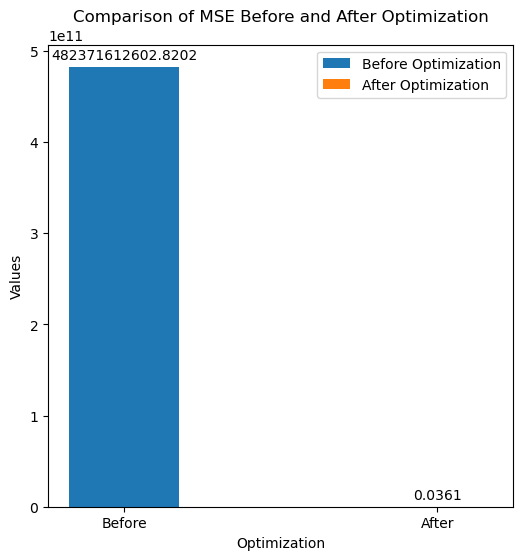

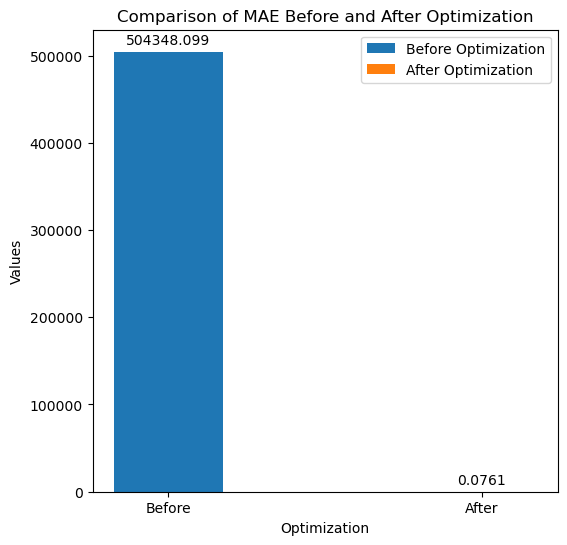

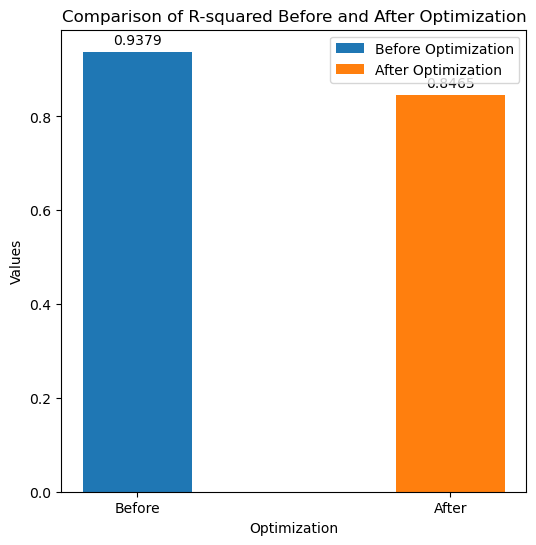

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define metrics and their values before and after optimization
metrics = ['MSE', 'MAE', 'R-squared']
values_before = [482371612602.8202, 504348.099, 0.9379]
values_after = [mse, mae, r2]

# Set positions for the bars
x = np.arange(len(metrics))

# Set width of the bars
width = 0.35  

# Create separate bar plots for each metric
for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(6, 6))
    rects1 = ax.bar(0, values_before[i], width, label='Before Optimization')
    rects2 = ax.bar(1, values_after[i], width, label='After Optimization')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Optimization')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of {} Before and After Optimization'.format(metric))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Before', 'After'])
    ax.legend()

    # Add value labels on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 4)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.show()



# 

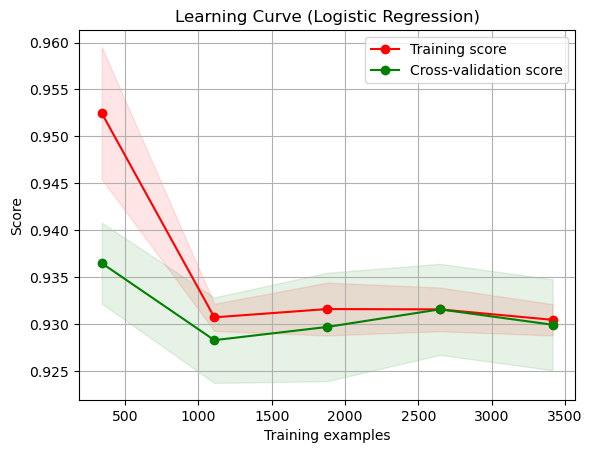

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression
title = "Learning Curve (Logistic Regression)"
cv = 5 # Number of cross-validation folds
plot_learning_curve(model, title, X, y, cv=cv, n_jobs=-1)

plt.show()


In [107]:
from sklearn.svm import SVC

# Step 1: Data Preparation
X_logistic = data[[' education', ' self_employed', ' cibil_score']]
y_logistic = data[' loan_status']

# Step 2: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Step 3: Model Building with Support Vector Classifier (SVC)
model = SVC(kernel='linear', random_state=42)  # You can also try different kernels like 'rbf' or 'poly'
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9402810304449649
Confusion Matrix:
[[501  35]
 [ 16 302]]
Precision: 0.8961424332344213
Recall: 0.949685534591195
F1 Score: 0.9221374045801526
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       536
           1       0.90      0.95      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



before:<br>
Accuracy Score: 0.9309133489461359 <br>
Confusion Matrix:<br>
[[502  34]

[ 25 293]]
 
 
Precision: 0.8960244648318043<br>
Recall: 0.9213836477987422<br>
F1 Score: 0.9085271317829456<br>
Classification Report:<br>
              precision    recall  f1-score   support <br>

           0       0.95      0.94      0.94       536 <br>
           1       0.90      0.92      0.91       318 <br>

    accuracy                           0.93       854 <br>
   macro avg       0.92      0.93      0.93       854 <br>
weighted avg       0.93      0.93      0.93       854 <br>

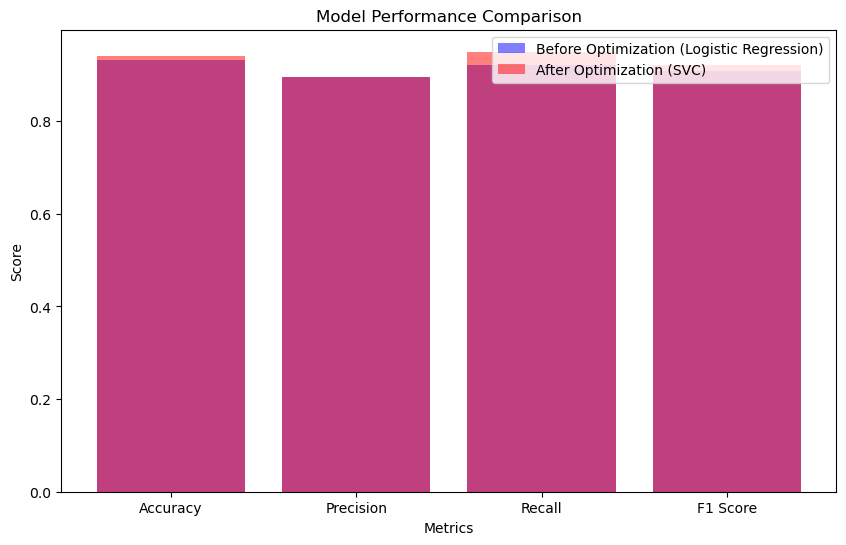

In [122]:
import matplotlib.pyplot as plt

# Define metrics before and after optimization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_reg_metrics = [0.9309, 0.8960, 0.9214, 0.9085]
optimized_svc_metrics = [0.9403, 0.8961, 0.9497, 0.9221]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(metrics, logistic_reg_metrics, color='b', alpha=0.5, label='Before Optimization (Logistic Regression)')
plt.bar(metrics, optimized_svc_metrics, color='r', alpha=0.5, label='After Optimization (SVC)')
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()


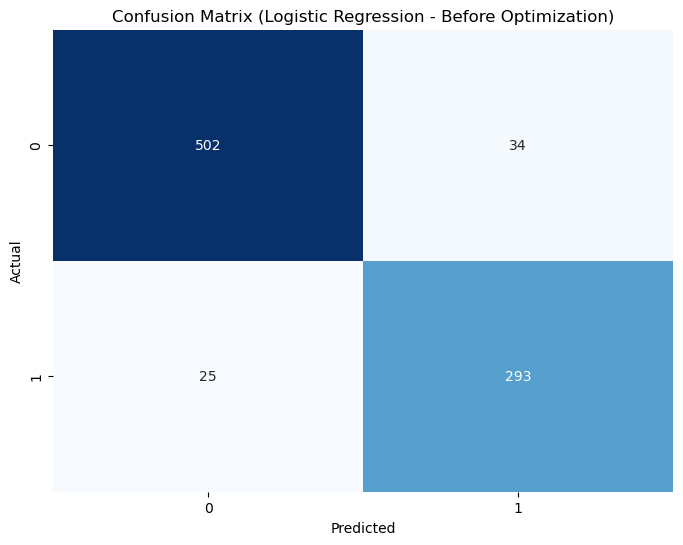

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix values
conf_matrix_before = np.array([[502, 34],
                               [25, 293]])

# Plot confusion matrix for logistic regression before optimization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Logistic Regression - Before Optimization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


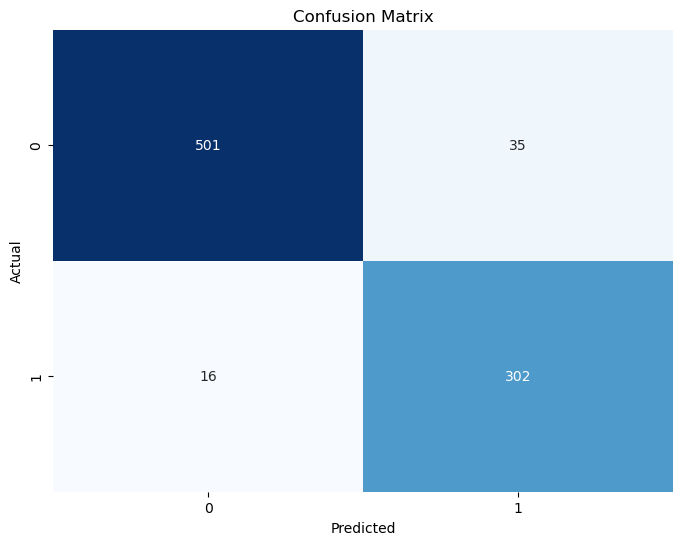

In [123]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


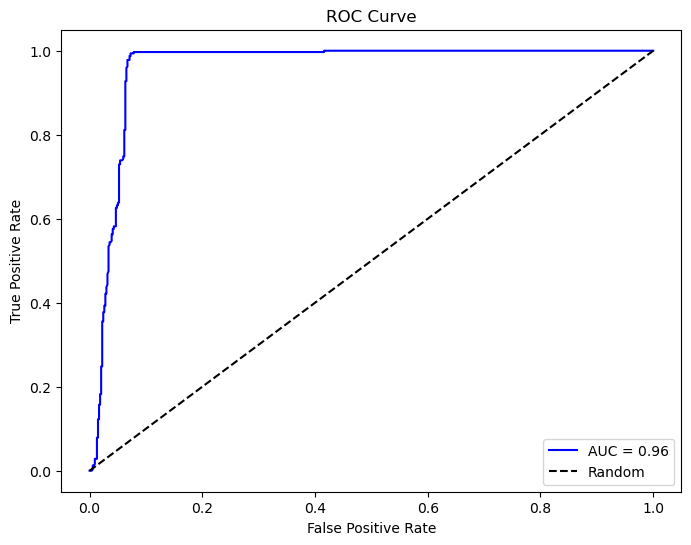

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
auc = roc_auc_score(y_test, model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


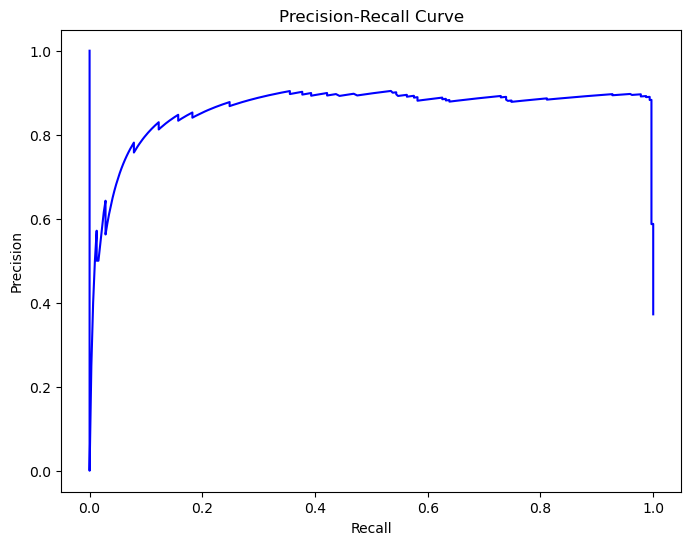

In [125]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')fr 
plt.show()


In [137]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the initial dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Double the dataset
data2 = pd.concat([data, data], ignore_index=True)

# Convert boolean data to numeric using label encoding
label_encoder = LabelEncoder()
data2[' education'] = label_encoder.fit_transform(data2[' education'])
data2[' self_employed'] = label_encoder.fit_transform(data2[' self_employed'])
data2[' loan_status'] = label_encoder.fit_transform(data2[' loan_status'])

# Save the new dataset as data2.csv
data2.to_csv('data2.csv', index=False)


In [138]:
# Load the new dataset data2
data2 = pd.read_csv('data2.csv')

# Preprocess the data2 (e.g., split features and labels, scale features if needed)

# Test the logistic regression model
# Use the optimized logistic regression model to make predictions and evaluate performance metrics

# Test the linear regression model
# Use the optimized linear regression model to make predictions and evaluate performance metrics


In [139]:
data2

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8533,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
8534,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
8535,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
8536,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the new dataset data2
data2 = pd.read_csv('data2.csv')

# Preprocess the data2 if needed (ensure that the feature columns used in the model are present)
# Assuming the feature columns are ['loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'] and target column is 'income_annum'
X = data2[[' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']]
y = data2[' income_annum']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the linear regression model
print('Linear Regression Performance:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred).round(4))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred).round(4))
print('R-squared:', r2_score(y_test, y_pred).round(4))

# RandomForestRegressor hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Best parameters
print("Best Parameters for RandomForestRegressor:", grid_search.best_params_)

# Best RandomForestRegressor model
best_rf_model = grid_search.best_estimator_

# Predictions with RandomForestRegressor
y_pred_rf = best_rf_model.predict(X)

# Evaluate RandomForestRegressor
print('RandomForestRegressor Performance:')
print('Mean Squared Error:', mean_squared_error(y, y_pred_rf).round(4))
print('Mean Absolute Error:', mean_absolute_error(y, y_pred_rf).round(4))
print('R-squared:', r2_score(y, y_pred_rf).round(4))


Linear Regression Performance:
Mean Squared Error: 486076849003.4833
Mean Absolute Error: 519394.3622
R-squared: 0.9395


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Income_annum')
plt.ylabel('Predicted Income_annum')
plt.title('Linear Regression: Predicted vs Actual Income_annum')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

# Load the new dataset
data = pd.read_csv('data2.csv')

# Step 1: Data Preparation
X_logistic = data[[' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']]
y_logistic = data[' income_annum']

# Step 2: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Step 3: Model Building with Support Vector Classifier (SVC)
model = SVC(kernel='linear', random_state=42)  # You can also try different kernels like 'rbf' or 'poly'
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# Classification report


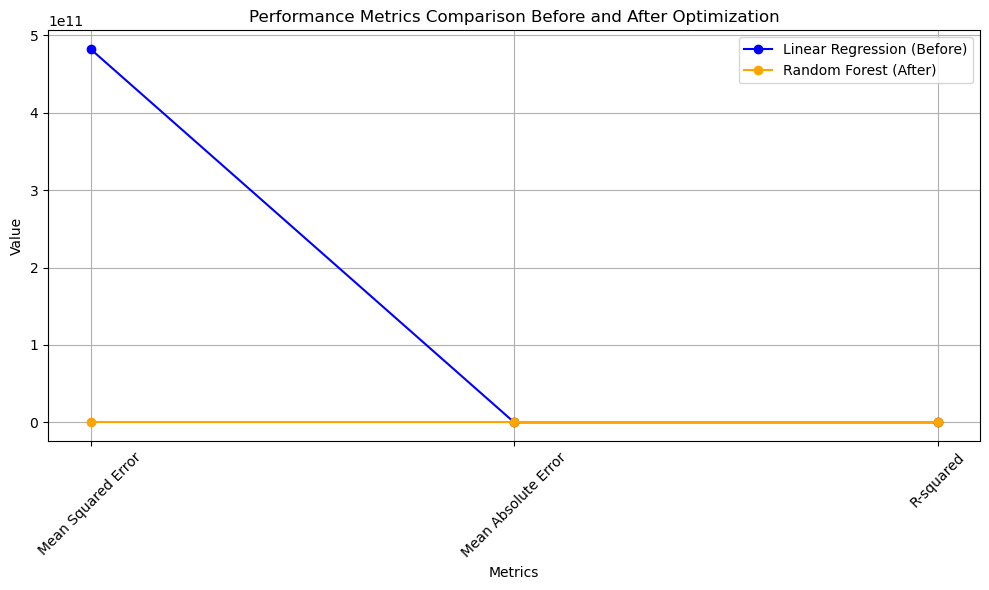

In [109]:
# Define performance metrics
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']
linear_results_before = [mse_linear_before, mae_linear_before, r2_linear_before]
rf_results_after = [mse_rf_after, mae_rf_after, r2_rf_after]

# Plotting
plt.figure(figsize=(10, 6))

# Plot performance metrics before optimization
plt.plot(metrics, linear_results_before, marker='o', linestyle='-', color='blue', label='Linear Regression (Before)')
# Plot performance metrics after optimization
plt.plot(metrics, rf_results_after, marker='o', linestyle='-', color='orange', label='Random Forest (After)')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics Comparison Before and After Optimization')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
